In [1]:
import cv2
import numpy as np
import os
import random

In [41]:
directory=r"/kaggle/input/microsoft-catsvsdogs-dataset/PetImages"
categories=["Cat","Dog"]
IMG_SIZE = 100

img_data = []
for catago in categories:
    folder = os.path.join(directory, catago)
    label = categories.index(catago)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)

        try:
            img_array = cv2.imread(img_path)
            
            if img_array is not None and not img_array.size == 0:
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                img_data.append([img_array, label])
            else:
                print(f"Error loading or resizing image: {img_path}")

        except Exception as e:
            print(f"Error processing image {img_path}: {str(e)}")
            
        if len(img_data) == 1000 or len(img_data) == 2000 :
            break

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


Error loading or resizing image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/4833.jpg
Error loading or resizing image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/850.jpg
Error loading or resizing image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6059.jpg
Error loading or resizing image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11849.jpg


In [42]:
random.shuffle(img_data)

In [43]:
len(img_data)

2000

In [44]:
img_data[0][0]

array([[[204, 161, 128],
        [206, 160, 127],
        [211, 164, 131],
        ...,
        [ 28,  63,  79],
        [ 32,  64,  84],
        [ 31,  61,  82]],

       [[212, 166, 132],
        [206, 160, 126],
        [205, 158, 125],
        ...,
        [ 26,  81,  96],
        [ 31,  79,  97],
        [ 30,  68,  90]],

       [[222, 174, 139],
        [212, 167, 130],
        [207, 162, 126],
        ...,
        [ 32,  84, 101],
        [ 38,  75,  95],
        [ 40,  67,  91]],

       ...,

       [[106, 130, 153],
        [102, 127, 148],
        [103, 129, 149],
        ...,
        [ 77, 132, 137],
        [ 73, 129, 136],
        [ 69, 126, 135]],

       [[ 97, 124, 148],
        [105, 132, 153],
        [108, 133, 154],
        ...,
        [ 94, 147, 150],
        [ 85, 140, 146],
        [ 79, 136, 145]],

       [[104, 130, 154],
        [110, 128, 154],
        [ 95, 122, 146],
        ...,
        [ 88, 139, 149],
        [ 93, 144, 152],
        [ 85, 139, 143]]

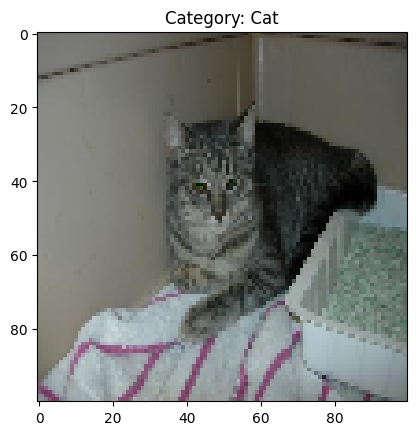

In [51]:
from PIL import Image
import matplotlib.pyplot as plt

index_to_display = 1

selected_img_array, selected_label = img_data[index_to_display]
selected_category = categories[selected_label]

pil_image = Image.fromarray(cv2.cvtColor(selected_img_array, cv2.COLOR_BGR2RGB))

plt.imshow(pil_image)
plt.title(f'Category: {selected_category}')
plt.show()

In [15]:
x=[]
y=[]
for image,label in img_data:
    x.append(image)
    y.append(label)

X=np.array(x)
Y=np.array(y)

# del img_data

In [16]:
X=X/255.0

In [17]:
X.shape

(2000, 100, 100, 3)

In [18]:
Y.shape

(2000,)

In [19]:
from sklearn.model_selection import train_test_split

test_size = 0.2  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

del X,Y,x,y

In [20]:
len(X_train), len(X_test)

(1600, 400)

In [21]:
# import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Activation, Dropout
from PIL import Image

In [65]:
X_train.shape[1:]

(100, 100, 3)

In [ ]:
# Create a model withouut any convolutional layers

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2, batch_size=64)

In [23]:
model = Sequential()

model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  
model.add(Dense(64))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))  

In [24]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [25]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
20/20 [==============================] - 87s 4s/step - loss: 0.9144 - accuracy: 0.5164 - val_loss: 0.6927 - val_accuracy: 0.4781
Epoch 2/10
20/20 [==============================] - 89s 4s/step - loss: 0.6914 - accuracy: 0.5461 - val_loss: 0.6891 - val_accuracy: 0.5781
Epoch 3/10
20/20 [==============================] - 85s 4s/step - loss: 0.6909 - accuracy: 0.5680 - val_loss: 0.6886 - val_accuracy: 0.5437
Epoch 4/10
20/20 [==============================] - 85s 4s/step - loss: 0.6628 - accuracy: 0.5938 - val_loss: 0.6641 - val_accuracy: 0.6031
Epoch 5/10
20/20 [==============================] - 86s 4s/step - loss: 0.6228 - accuracy: 0.6664 - val_loss: 0.6765 - val_accuracy: 0.6156
Epoch 6/10
20/20 [==============================] - 84s 4s/step - loss: 0.5507 - accuracy: 0.7070 - val_loss: 0.6697 - val_accuracy: 0.6219
Epoch 7/10
20/20 [==============================] - 85s 4s/step - loss: 0.4976 - accuracy: 0.7664 - val_loss: 0.7022 - val_accuracy: 0.6187
Epoch 8/10
20/20 [==

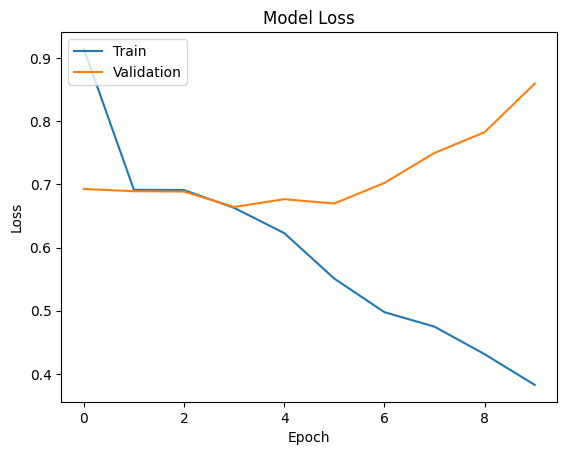

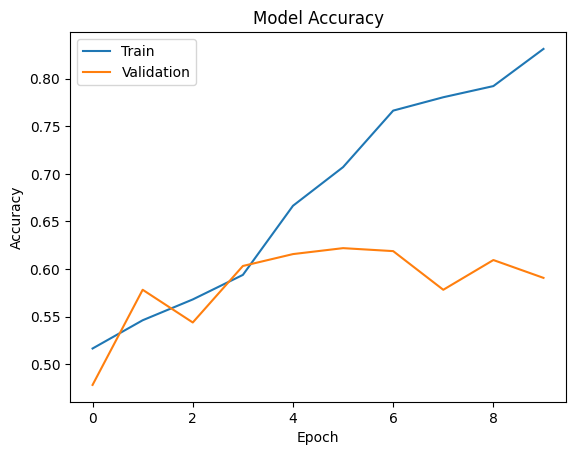

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
model.save('cats_vs_dogs_2C_model.keras')

In [ ]:
#model.load('cats_vs_dogs_2C_model.keras')

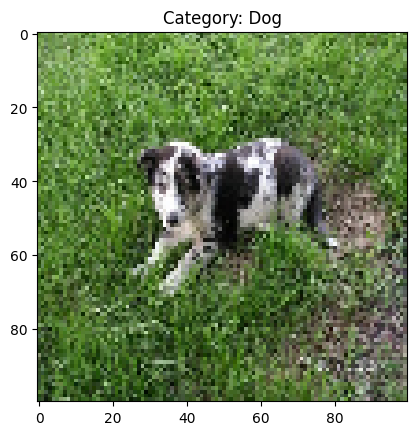

1/1 [==============================] - 0s 43ms/step
Prediction:  Dog


In [64]:
index_to_display = 6

selected_img_array, selected_label = img_data[index_to_display]
selected_category = categories[selected_label]

pil_image = Image.fromarray(cv2.cvtColor(selected_img_array, cv2.COLOR_BGR2RGB))
plt.imshow(pil_image)
plt.title(f'Category: {selected_category}')
plt.show()

new_array = cv2.resize(selected_img_array, (100, 100))
new_array = np.expand_dims(new_array, axis=0)

prediction = model.predict(new_array)
print("Prediction: ",categories[int(prediction[0][0])])